In [1]:
import pandas as pd
tempData = pd.read_csv('./GlobalSurfaceTemp.txt', sep="\t", header=None)
tempData.columns = ["year", "tempChangeA", "tempChangeB"]
justtemp = tempData.set_index("year")
justtemp = justtemp[80:-1]
justtemp = justtemp[justtemp.index<=2012]

justtemp.tail()

,tempChangeA,tempChangeB
year,,
2008,0.52,0.62
2009,0.63,0.62
2010,0.70,0.62
2011,0.57,0.63
2012,0.61,0.67


In [2]:
co2data = pd.read_csv('./Co2Data.csv', index_col = "Country Name")
co2data = co2data.drop(["2015","2016","2017"],axis=1)
co2data = co2data.loc[:, ~co2data.columns.str.contains('^Unnamed')]
co2data = co2data.drop("Country Code", axis=1)
co2data = co2data.drop("Indicator Code", axis=1)
co2data = co2data.drop("Indicator Name", axis=1)
co2data = co2data.fillna(method='ffill').fillna(method='bfill')
co2data = co2data.dropna()

for year in range(1960, 2014):
    co2data[str(year)] = co2data[str(year)].astype('int')

co2data.loc['Total']= (co2data.sum()/1000)
co2data = co2data.transpose()
co2data = co2data.loc[:, ['Total']]
co2data.columns = ["Total"]
co2data = co2data.fillna(method='ffill').fillna(method='bfill')
co2data = co2data[:-2]
co2data.tail()

,Total
2008,282924.194
2009,282487.445
2010,297847.399
2011,312921.249
2012,319459.110


In [3]:
temp = pd.DataFrame()
temp["A"] = justtemp['tempChangeA'].values
temp["B"] = co2data['Total'].values

In [4]:
temp.corr()

,A,B
A,1.00000,0.88919
B,0.88919,1.00000


In [5]:
import scipy.stats
pred_line = scipy.stats.linregress(co2data["Total"], justtemp["tempChangeA"])
print (pred_line)

LinregressResult(slope=3.5646221725232056e-06, intercept=-0.3768583162839198, rvalue=0.8891904270540035, pvalue=5.979146036241749e-19, stderr=2.568385126844722e-07)


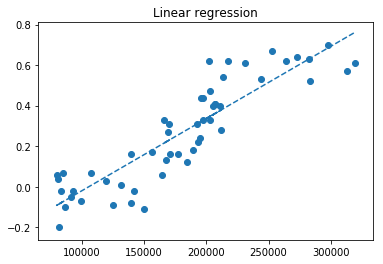

In [7]:
import matplotlib.pyplot as plt
import numpy as np
y = justtemp['tempChangeA'].values
x = co2data['Total'].values
predy = [(pred_line.slope*xval + pred_line.intercept) for xval in x]
plt.plot(x, predy, '--')
plt.scatter(x, y)
# plt.plot(x, abline_values, 'b')
plt.title("Linear regression")
plt.show()